<a href="https://colab.research.google.com/github/surchau/gai/blob/main/Activities/Day%201/Class%20Activity/Ex_1/Colab_deeplearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Learning with Keras

This notebook shows how to build a deep learning model to predict the quality score of different wines

In [1]:
# Initial imports
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

%matplotlib inline

In [2]:
# Read in data
data = "https://raw.githubusercontent.com/tatwan/generative_ai_class/main/Activities/Day%201/Data/student_loans.csv"
df = pd.read_csv(data)
df.head()

,payment_history,location_parameter,stem_degree_score,gpa_ranking,alumni_success,study_major_code,time_to_completion,finance_workshop_score,cohort_ranking,total_loan_score,financial_aid_score,credit_ranking
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
# Create the features (X) and target (y) sets
x = df.iloc[:, 0:11]
y = df['cohort_ranking']

In [4]:
# Scale the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(x)
x = scaler.transform(x)

## Define a model with 1 hidden layer

In [5]:
# Define the model - shallow neural net
number_hidden_nodes = 8
number_input_features = 11

# Hidden layer
nn = Sequential()

nn.add(Dense(units=number_hidden_nodes, input_dim=number_input_features, activation = 'relu'))

# Output layer
nn.add(Dense(units=1, activation='linear'))



In [6]:
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 96        
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 105 (420.00 Byte)
Trainable params: 105 (420.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [7]:
# Compile the model
nn.compile(loss='mean_squared_error', optimizer = 'adam', metrics=['mse'])

# Train the model
# model = nn.fit(x, y, validation_split=0.3, epochs=200, verbose=0)  # use verbose=0 to not log details
model = nn.fit(x, y, validation_split=0.3, epochs=200)  # show details


Epoch 1/200
35/35 [==============================] - 1s 8ms/step - loss: 10.9806 - mse: 10.9806 - val_loss: 11.9849 - val_mse: 11.9849
Epoch 2/200
35/35 [==============================] - 0s 3ms/step - loss: 9.2172 - mse: 9.2172 - val_loss: 10.4113 - val_mse: 10.4113
Epoch 3/200
35/35 [==============================] - 0s 3ms/step - loss: 7.7133 - mse: 7.7133 - val_loss: 9.0620 - val_mse: 9.0620
Epoch 4/200
35/35 [==============================] - 0s 4ms/step - loss: 6.4344 - mse: 6.4344 - val_loss: 7.9105 - val_mse: 7.9105
Epoch 5/200
35/35 [==============================] - 0s 3ms/step - loss: 5.3744 - mse: 5.3744 - val_loss: 6.8812 - val_mse: 6.8812
Epoch 6/200
35/35 [==============================] - 0s 4ms/step - loss: 4.4979 - mse: 4.4979 - val_loss: 5.9770 - val_mse: 5.9770
Epoch 7/200
35/35 [==============================] - 0s 3ms/step - loss: 3.7804 - mse: 3.7804 - val_loss: 5.1581 - val_mse: 5.1581
Epoch 8/200
35/35 [==============================] - 0s 4ms/step - loss: 3.17

<function matplotlib.pyplot.show(close=None, block=None)>

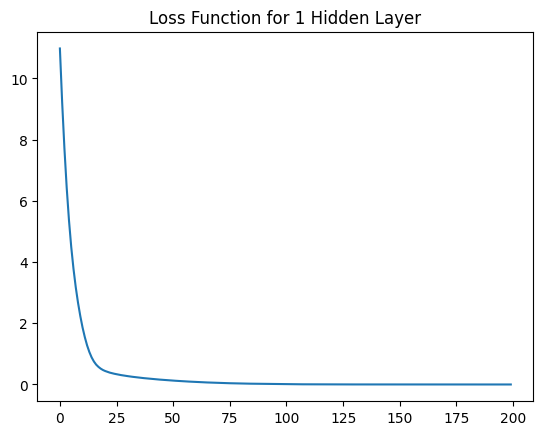

In [8]:
# Plot the train and test loss function
plt.plot(model.history["loss"])
plt.title("Loss Function for 1 Hidden Layer")
plt.show

In [20]:
nn_model_json = nn.to_json()
print(nn_model_json)
# file_path = "C:\\Users\\schauhan\\model.h5"
file_path = "model.h5"

nn.save_weights(file_path)

{"class_name": "Sequential", "config": {"name": "sequential", "layers": [{"module": "keras.layers", "class_name": "InputLayer", "config": {"batch_input_shape": [null, 11], "dtype": "float32", "sparse": false, "ragged": false, "name": "dense_input"}, "registered_name": null}, {"module": "keras.layers", "class_name": "Dense", "config": {"name": "dense", "trainable": true, "dtype": "float32", "batch_input_shape": [null, 11], "units": 8, "activation": "relu", "use_bias": true, "kernel_initializer": {"module": "keras.initializers", "class_name": "GlorotUniform", "config": {"seed": null}, "registered_name": null}, "bias_initializer": {"module": "keras.initializers", "class_name": "Zeros", "config": {}, "registered_name": null}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}, "registered_name": null, "build_config": {"input_shape": [null, 11]}}, {"module": "keras.layers", "class_name": "Dense", "config": 

In [21]:
from tensorflow.keras.models import model_from_json

In [22]:
loaded_model = model_from_json(nn_model_json)
loaded_model.load_weights('model.h5')

## Define a model with 2 hidden layers

In [ ]:
# Define the model - deep neural net


# First hidden layer


# Second hidden layer


# Output layer



In [ ]:
# Compile model

# Fit the model


In [ ]:
# Overlay results of deep and shallow models


In [ ]:
# Train vs test for shallow net


In [ ]:
# Train vs test for deep net
